In [ ]:
"""
Go from start node to end node

then have an [already checked] edge

"""

In [1]:
"""
Purpose: To implement a proofreading rule that eliminates axon messes

Psuedocode: 
1) Get the concept graph of the axon 
2) Eliminate all of the nodes that are too long skeletal length
3) Divide the remaining axon into connected components
- if too many nodes are in the connected component then it is
an axon mess and should delete all those nodes




"""

'\nPurpose: To implement a proofreading rule that eliminates axon messes\n\nPsuedocode: \n1) Get the concept graph of the axon \n2) Eliminate all of the nodes that are too long skeletal length\n3) Divide the remaining axon into connected components\n- if too many nodes are in the connected component then it is\nan axon mess and should delete all those nodes\n\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")

In [4]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

import classification_utils as clu
import proofreading_utils as pru

INFO - 2021-02-02 07:19:34,984 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-02 07:19:34,985 - settings - Setting database.user to celiib
INFO - 2021-02-02 07:19:34,986 - settings - Setting database.password to newceliipass
INFO - 2021-02-02 07:19:34,998 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-02 07:19:34,999 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-02 07:19:35,012 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-02 07:19:35,301 - settings - Setting enable_python_native_blobs to True


In [5]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-02 07:19:35,393 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-02 07:19:35,676 - settings - Setting enable_python_native_blobs to True


# Getting the Neuron

In [6]:
#segment_id = 864691134884741370 #worked
segment_id = 864691135428521008

In [7]:
neuron_table = (minnie.Decomposition() & dict(segment_id=segment_id))
neuron_table

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135428521008,0,0.25,30.00,0,0,1,=BLOB=,328724,662582,0,1,1,0,1,10,279,98,8747970.255598318,3465195.3563792882,20348.273,68.848,68.848,130.723,130.723,2,2.2862446276838764e-07,0.007168458781362007,191077.376,25,1.0466963917277156e-05,0.08,189757354.24011227,94878677.12005614,21.691586584748144,993.0916899346173,7590294.169604491,840.0445


In [8]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [9]:
neuron_obj.calculate_spines()

query = median_mesh_center > 115 and n_faces_branch>100
smoothness_threshold = 0.12
The median_mesh_center was requested and HAS already been calculated
segment_name before cgal = L0_2



segment_name before cgal = L0_40



segment_name before cgal = L0_41



segment_name before cgal = L0_42



segment_name before cgal = L0_44



There was only one mesh found from the spine process and mesh split, returning empty array
segment_name before cgal = L0_46



There was only one mesh found from the spine process and mesh split, returning empty array
segment_name before cgal = L0_47



segment_name before cgal = L0_48



segment_name before cgal = L0_49



segment_name before cgal = L0_53



segment_name before cgal = L0_55



segment_name before cgal = L1_14



segment_name before cgal = L1_20



segment_name before cgal = L1_25



segment_name before cgal = L1_26



segment_name before cgal = L1_30



segment_name before cgal = L1_36



segment_name before cgal = L1_47



segment_name before cgal = L1_56



segment_name before cgal = L1_57



segment_name before cgal = L1_87



segment_name before cgal = L1_89



segment_name before cgal = L2_7



There was only one mesh found from the spine process and mesh split, returning empty array
segment_name before cgal = L2_14



segment_name before cgal = L2_15



segment_name before cgal = L2_18



segment_name before cgal = L3_2



segment_name before cgal = L3_12



segment_name before cgal = L4_3



segment_name before cgal = L4_5



segment_name before cgal = L4_10



segment_name before cgal = L4_23



segment_name before cgal = L5_3



There was only one mesh found from the spine process and mesh split, returning empty array
segment_name before cgal = L6_8



segment_name before cgal = L6_9



segment_name before cgal = L6_10


In [10]:
# Splitting the Neuron and Finding Axon Mess

In [11]:
nviz.visualize_neuron(neuron_obj,
                      limb_branch_dict="all")

[autoreload of neuron_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/neuron_utils.py", line 4768
    elsee:
         ^
SyntaxError: inv


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [47]:
neuron_obj_split = pru.split_neuron(neuron_obj)
neuron_obj_s = neuron_obj_split[0]


 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 2  4  5  7  8  9 10 11 12 13 14 15 16 17 20 21]
***inside resolve crossover!!!!****
match_branches = [[11, 14], [13, 17]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(3, 5), (5, 9), (9, 16), (16, 8), (8, 7), (11, 6)]
G.nodes() = [3, 5, 9, 16, 8, 7, 11, 6]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
curr_limb_copy.deleted_edges = [[7, 11], [7, 13], [7, 14], [7, 17], [11, 13], [11, 17], [13, 14], [14, 17]]
curr_limb_copy.created_edges = [[11, 14], [13, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------


------ Working on Soma 0 -------
limb_neighbors = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
limb_neighbors BEFORE error limbs removed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
limb_neighbors AFTER error limbs removed = [ 

In [49]:
neuron_obj_s = neuron_obj_split[0]

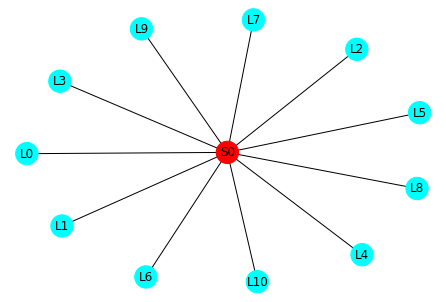

In [50]:
nviz.plot_soma_limb_concept_network(neuron_obj_s)

# Filtering Function for High Degree Nodes

In [45]:
curr_high_degree_coord = nru.high_degree_branching_coordinates_on_limb(neuron_obj[4])
curr_high_degree_coord

array([[1366220.07333254,  949420.25258991, 1003456.56119997]])

In [46]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L4="all"),
                      mesh_color="green",
                      skeleton_color="blue",
                     scatters=curr_high_degree_coord,
                     scatter_size=0.2)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [38]:
pru.high_degree_coordinates_elimination_limb_branch_dict(neuron_obj)

{'L0': [90,
  74,
  75,
  91,
  78,
  14,
  16,
  81,
  79,
  92,
  84,
  80,
  86,
  87,
  89,
  26,
  27,
  28,
  93,
  17,
  18,
  20,
  15,
  19],
 'L4': [11, 12, 6, 13, 14, 17]}

In [51]:
neuron_obj_no_high, at1, at2 = pru.filter_away_high_degree_coordinates(neuron_obj_s,
                                       return_error_info=True,
                                        plot_limb_branch_filter_with_disconnect_effect=True)



Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh




----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1356567.66666667  942436.73333333 1010273.92307692]---------
Starting_edge inside branches_to_conept = [[1356567.66666667  942436.73333333 1010273.92307692]
 [1356905.20345718  942366.09881324 1009628.29939062]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [29]
printing out current edge:
[[1356567.66666667  942436.73333333 1010273.92307692]
 [1356905.20345718  942366.09881324 1009628.29939062]]
edge_endpoints_to_process was empty so exiting loop after 74 iterations
starting_node in concept map (that should match the starting edge) = 34
Total time for branches to concept conversion = 1.9431235790252686

Done generating concept network 




------ Working on Soma 0 -------
limb_neighbors = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
limb_neighbors BEFORE error limbs removed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
limb_neighbors AFTER error limbs rem

In [52]:
nviz.visualize_neuron_lite(neuron_obj_no_high)


 Working on visualization type: mesh


# Developing the High Degree Function for the limb

In [34]:
limb_obj =  neuron_obj[0]
min_degree_to_find = 5

pru.edges_to_create_and_delete_high_degree_coordinate(limb_obj,
                                                     min_degree_to_find = min_degree_to_find,
                                                     verbose=True)



curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = [4502]
curr_high_degree_coordinates = [[1323697.65401522  952453.99516759 1073409.05502784]]
high_degree_branch_groups = [[16, 17, 18, 19, 21]]
For branch group ([16, 17, 18, 19, 21]), the edges to cut were: [array([16, 17]), array([16, 18]), array([16, 19]), array([16, 21]), array([17, 18]), array([17, 19]), array([17, 21]), array([18, 19]), array([18, 21]), array([19, 21])]


([],
 [array([16, 17]),
  array([16, 18]),
  array([16, 19]),
  array([16, 21]),
  array([17, 18]),
  array([17, 19]),
  array([17, 21]),
  array([18, 19]),
  array([18, 21]),
  array([19, 21])])

In [54]:
x = ["axon","axon-like","hi"]
y = ["yes","axon"]

import numpy as np
np.intersect1d(x,y)

array(['axon'], dtype='<U9')

In [26]:
limb_obj = neuron_obj[1]
nru.branches_at_high_degree_coordinates(limb_obj)

[]

# Want to find all of the high degree nodes

In [ ]:
scatter_points = nru.high_degree_branching_coordinates(neuron_obj,
                                     min_degree_to_find=5,
                                     exactly_equal=False)

In [ ]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["skeleton","mesh"],
                     limb_branch_dict="all",
                     scatters=scatter_points,
                     scatter_size=0.1)

In [ ]:
railroad_intersections = nru.high_degree_branching_coordinates(neuron_obj,
                                     min_degree_to_find=4,
                                     exactly_equal=True)

In [ ]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                      mesh_whole_neuron=True,
                     scatters=railroad_intersections,
                     scatter_size=0.25)